# Carte de Kohonen et MiniSom

## Qu'est-ce qu'une Carte de Kohonen ?

Une **carte de Kohonen**, ou **SOM (Self-Organizing Map)**, est un type de réseau de neurones non supervisé. Elle est utilisée pour :
- **Réduire la dimensionnalité des données.**
- **Faire du clustering** en groupant les données similaires.
- **Préserver la topologie :** Les points proches dans l'espace d'entrée restent proches sur la carte.

### Fonctionnement
1. **Apprentissage non supervisé :** Aucun label requis.
2. **Organisation en grille :** Chaque cellule (neurone) représente un groupe de données.
3. **Mise à jour des poids :** Les poids des neurones proches des données d'entrée sont ajustés.

---

## `MiniSom` : Une bibliothèque Python

**MiniSom** est une bibliothèque Python simple pour créer et entraîner des cartes de Kohonen. Elle permet de :
- **Créer des SOM facilement.**
- **Visualiser les clusters** et la structure des données.
- **Analyser des données complexes.**



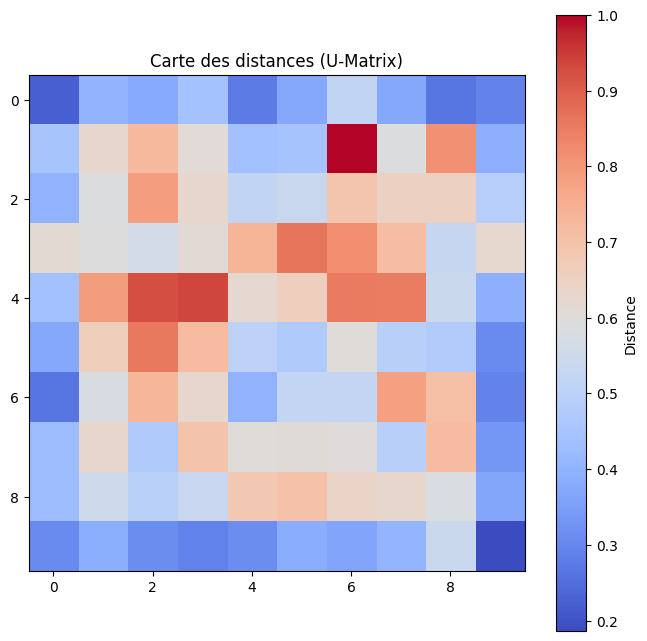

Clusters et chansons associées :
Cluster (8, 2):
 - Singende Bataillone 1. Teil
 - Invocación al Tango - Remasterizado
 - Tendrás Que Llorar Conmigo - Instrumental (Remasterizado)
 - La Recova - Instrumental (Remasterizado)
 - El Espejito - Remasterizado
 - Venite Conmigo - Remasterizado
 - Abuelita - Remasterizado
 - Timbero - Instrumental (Remasterizado)
 - La Cabeza del Italiano - Instrumental (Remasterizado)
 - ¿Te Acuerdas Mamita? - Instrumental (Remasterizado)
 - Tu Disfraz - Remasterizado
 - Cualquier Cosa - Remasterizado
 - Asuero - Instrumental (Remasterizado)
 - Cascabeles - Remasterizado
 - Esclavas blancas
 - La Traicionera - Remasterizado
 - Por seguidora y por fiel
 - Lo Han Visto Con Otra - Remasterizado
 - La Femme À Barbe
 - O Kosmos Plouti Lahtari
 - Kalogeraki
 - 何日君再來 - 二
 - Goldberg Variations, BWV 988: Variation IX - Canon at the Third
 - Verdi : La forza del destino : Act 2 "Che vedo!... mio fratello!" [Leonora, Alcade, Carlos, Chorus, Trabuco]
 - Aaya Basant Sak

In [ ]:
import pandas as pd
import numpy as np
from minisom import MiniSom
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from collections import defaultdict

#--spotify data--
url = "https://raw.githubusercontent.com/gabminamedez/spotify-data/master/data.csv"
data = pd.read_csv(url)

#--features les plus importants--
features = ['danceability', 'energy', 'tempo', 'valence', 'loudness', 'speechiness']
X = data[features].values

#--important de normaliser--
scaler = MinMaxScaler()
X = scaler.fit_transform(X)


titles = data['name']

#--carte de Kohonen--
som = MiniSom(x=10, y=10, input_len=X.shape[1], sigma=1.0, learning_rate=0.1, random_seed=42)
som.random_weights_init(X)
som.train_random(X, num_iteration=100)

#--viz--
plt.figure(figsize=(8, 8))

#--U-Matrix--
distances = som.distance_map()
plt.imshow(distances.T, cmap='coolwarm')
plt.colorbar(label='Distance')
plt.title('Carte des distances (U-Matrix)')
plt.show()

#--Clusterisation--
clusters = defaultdict(list)
for i, x in enumerate(X):
    winner = som.winner(x)
    clusters[winner].append(titles.iloc[i])  


print("Clusters et chansons associées :")
for cluster, song_list in clusters.items():
    print(f"Cluster {cluster}:")
    for song in song_list:
        print(f" - {song}")
